In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('homeprices_banglore.csv')
df.sample(5)


,area,bedrooms,price
6,2732,4,135.00
17,1540,3,60.00
7,3300,4,155.00
16,1180,3,48.00
0,1056,2,39.07


In [3]:
from sklearn import preprocessing

sx = preprocessing.MinMaxScaler()
sy = preprocessing.MinMaxScaler()

scaled_X = sx.fit_transform(df.drop('price', axis='columns'))
scaled_y = sy.fit_transform(df['price'].values.reshape(df.shape[0], 1))

In [4]:
def batch_gradient_descent(X, y_true, epcohs, learning_rate = 0.01):
    number_of_features = X.shape[1]
    w = np.ones(shape=(number_of_features))
    b = 0
    total_samples = X.shape[0]
    
    cost_list = []
    epoch_list = []
    
    for i in range(epcohs):
        y_predicted = np.dot(w, X.T) + b
        
        w_grad = -(2/total_samples)*(X.T.dot(y_true - y_predicted))
        b_grad = -(2/total_samples)*np.sum(y_true - y_predicted)
        
        w = w - learning_rate*w_grad
        b = b - learning_rate*b_grad
        
        cost = np.mean(np.square(y_true - y_predicted))
        
        if i%10 == 0:
            cost_list.append(cost)
            epoch_list.append(i)
            
    return w, b, cost, cost_list, epoch_list

w, b, cost, cost_list, epoch_list = batch_gradient_descent(scaled_X, scaled_y.reshape(scaled_y.shape[0],), 500)
w, b, cost


(array([0.70712464, 0.67456527]), -0.23034857438407427, 0.0068641890429808105)

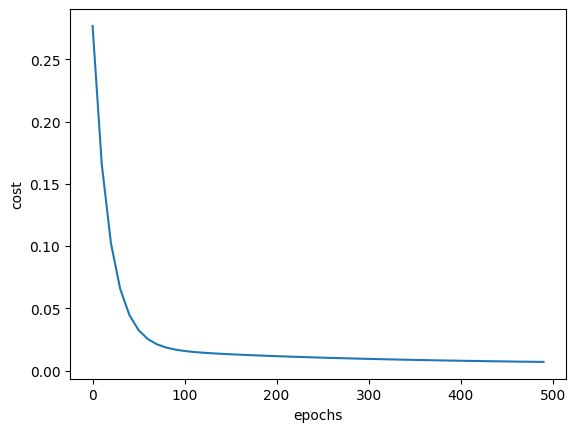

In [5]:
plt.xlabel('epochs')
plt.ylabel('cost')
plt.plot(epoch_list, cost_list)

In [6]:

def predict(area, bedrooms, w, b):
    scaled_X = sx.transform([[area, bedrooms]])[0]
    scaled_price = w[0]*scaled_X[0] + w[1]*scaled_X[1] + b
    return sy.inverse_transform([[scaled_price]])[0][0]

predict(2600, 4, w, b)

c:\Users\qasim\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


128.45484403267596

In [7]:

predict(1000, 2, w, b)

c:\Users\qasim\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


30.253094462442355

In [8]:
import random
random.randint(0, 6)

def stochastic_gradient_descent(X, y_true, epcohs, learning_rate = 0.01):
    number_of_features = X.shape[1]
    w = np.ones(shape=(number_of_features))
    b = 0
    total_samples = X.shape[0]
    
    cost_list = []
    epoch_list = []
    
    for i in range(epcohs):
        random_index = random.randint(0, total_samples - 1)
        sample_x = X[random_index]
        sample_y = y_true[random_index]
        
        y_predicted = np.dot(w, sample_x.T) + b
        
        w_grad = -(2/total_samples)*(sample_x.T.dot(sample_y - y_predicted))
        b_grad = -(2/total_samples)*(sample_y - y_predicted)
        
        w = w - learning_rate*w_grad
        b = b - learning_rate*b_grad
        
        cost = np.square(sample_y - y_predicted)
        
        if i%100 == 0:
            cost_list.append(cost)
            epoch_list.append(i)
            
    return w, b, cost, cost_list, epoch_list

w_sgd, b_sgd, cost_sgd, cost_list_sgd, epoch_list_sgd = stochastic_gradient_descent(scaled_X, scaled_y.reshape(scaled_y.shape[0],), 10000)
w_sgd, b_sgd, cost_sgd

(array([0.70509315, 0.67086338]), -0.22829766398301013, 0.006360353072813323)

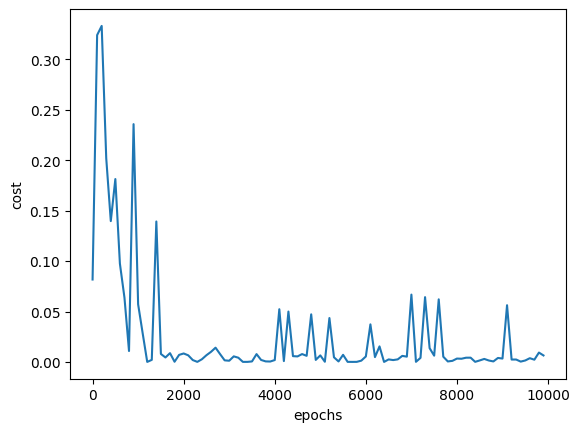

In [9]:
plt.xlabel('epochs')
plt.ylabel('cost')
plt.plot(epoch_list_sgd, cost_list_sgd)